# Analysis for the learning of the 3D dynamics with constant wind and the attack angle (alpha) as only state

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 17
label_fs = 13
legend_fs = 11

## 1) Q matrix

In [2]:
cQ = pd.read_csv("cQ_matrix3d.txt")

cQ.tail(4)

FileNotFoundError: File b'cQ_matrix3d.txt' does not exist

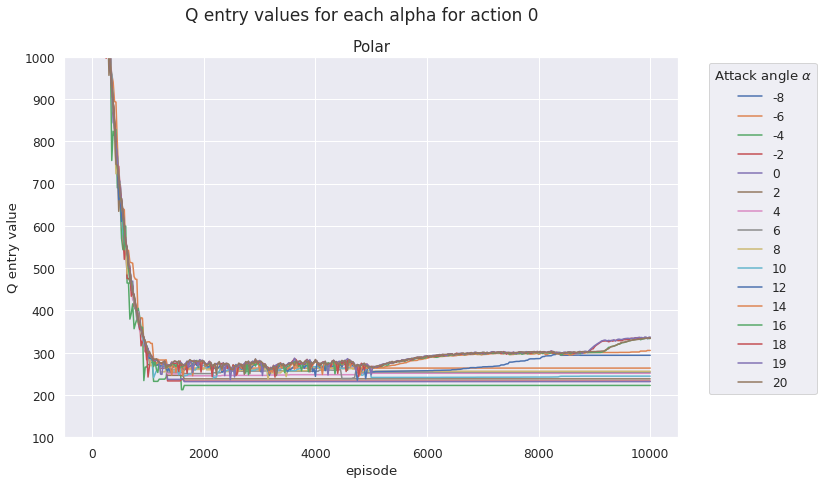

In [61]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(11, 7), gridspec_kw={'wspace': 0})

ep_max = cQ['episode'].max()
chosen_action = 0

for alph, val in enumerate(alphas):
    
    #if (alph > 5):
    
        fig.suptitle("Q entry values for each alpha for action " + str(chosen_action), fontsize = title_fs)

        df = cQ.loc[cQ['alpha_idx'] == alph]
        axs.plot(df['episode'], df['action_'+str(chosen_action)], label = str(alphas[alph]))
        axs.grid(b=True)

        plt.legend(title = 'Attack angle ' + r'$\alpha$', bbox_to_anchor=(1.04,1), loc="upper left")

        axs.set_ylabel('Q entry value')
        
        #axs.set_xlim(8000,ep_max)
        axs.set_ylim(100,1000)

        axs.set_title("Cartesian", fontsize = fs)
        axs.set_title("Polar", fontsize = fs)
    
        axs.set(xlabel='episode')
    

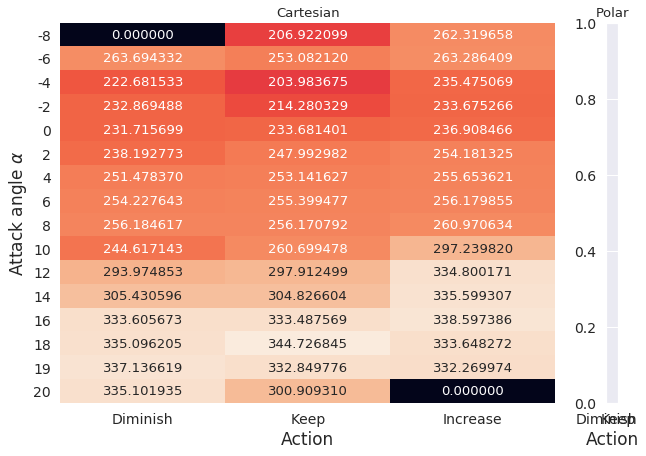

In [62]:
df1 = cQ[cQ['episode'] == cQ.episode.max()]
df1 = df1[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df1['action_1'].max(), df1['action_2'].max())

fig, axs = plt.subplots(ncols=2, gridspec_kw=dict(width_ratios=[8,0.2]),figsize=(10, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="f", cbar=False, ax=axs[0], vmin=vmin)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

#fig.colorbar(axs[1].collections[0], cax=axs[1])

plt.show()

# with mu

In [76]:
cQ = pd.read_csv("cQ_matrix3dmu.txt")

cQ.tail(5)

,episode,alpha_idx,mu_idx,action_alpha,action_mu,Q_value
119501,8250,15,2,2,2,0.000000
119502,8250,15,3,0,0,-129.137510
119503,8250,15,3,0,1,-125.873232
119504,8250,15,3,0,2,-141.352352
119505,8250,15,3,1,0,-128.880160


In [73]:
cQ[cQ['episode']==cQ.episode.max()]

,episode,alpha_idx,mu_idx,action_alpha,action_mu,Q_value
115920,8050,0,0,0.0,0.0,0.000000
115921,8050,0,0,0.0,1.0,0.000000
115922,8050,0,0,0.0,2.0,0.000000
115923,8050,0,0,1.0,0.0,0.000000
115924,8050,0,0,1.0,1.0,-128.729211
115925,8050,0,0,1.0,2.0,-122.063951
115926,8050,0,0,2.0,0.0,0.000000
115927,8050,0,0,2.0,1.0,-115.845538
115928,8050,0,0,2.0,2.0,-115.015185
115929,8050,0,1,0.0,0.0,0.000000


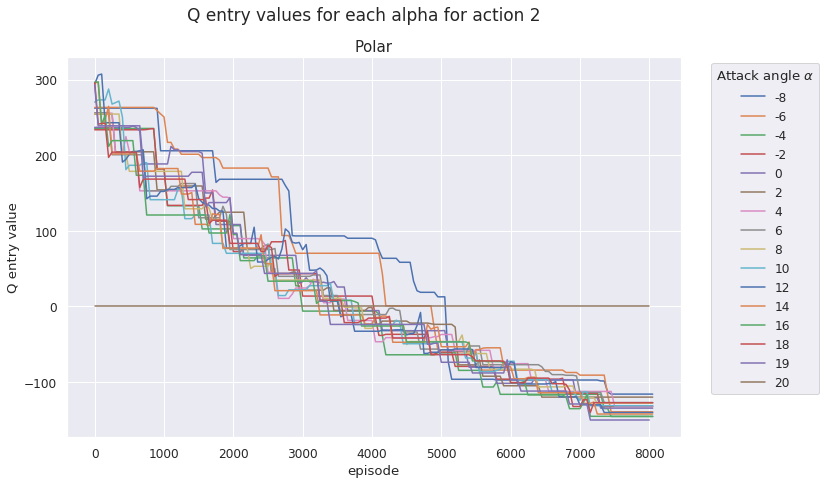

In [71]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(11, 7), gridspec_kw={'wspace': 0})

ep_max = cQ['episode'].max()
chosen_mu = 1
chosen_alpha_action = 2
chosen_mu_action = 0

for alph, val in enumerate(alphas):
    
    #if (alph > 5):
    
        fig.suptitle("Q entry values for each alpha for action " + str(chosen_action), fontsize = title_fs)

        df = cQ.loc[(cQ['alpha_idx'] == alph) & (cQ['mu_idx'] == chosen_mu) & (cQ['action_mu'] == chosen_mu_action)]
        df = df[df['action_alpha'] == chosen_alpha_action]
        axs.plot(df['episode'], df['Q_value'], label = str(alphas[alph]))
        axs.grid(b=True)

        plt.legend(title = 'Attack angle ' + r'$\alpha$', bbox_to_anchor=(1.04,1), loc="upper left")

        axs.set_ylabel('Q entry value')
        
        #axs.set_xlim(8000,ep_max)
        #axs.set_ylim(100,1000)

        axs.set_title("Cartesian", fontsize = fs)
        axs.set_title("Polar", fontsize = fs)
    
        axs.set(xlabel='episode')
    

## 2) Rewards

In [53]:
crew = pd.read_csv("crewards3d.txt")

crew.head(3)

,episode,epsilon,Alpha,steps,return
0,0,0.1,0.1,538544,15.181584
1,1,0.1,0.1,77269,19.719322
2,2,0.1,0.1,485601,31.389814


In [54]:
changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]
print(changes_cart)

[0, 5000]


[Text(0.5, 0, 'Episode')]

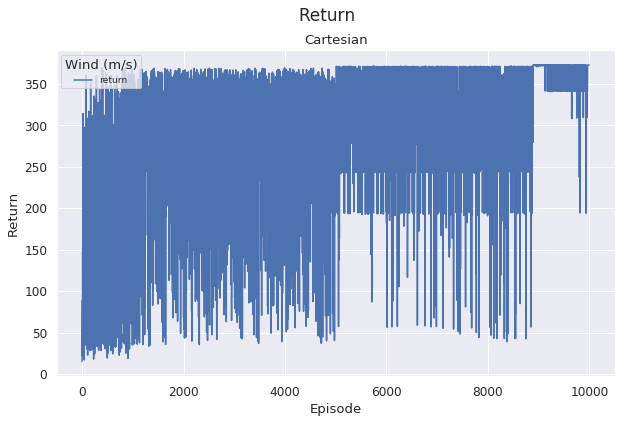

In [55]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 6), gridspec_kw={'wspace': 0})

fig.suptitle("Return", fontsize = title_fs)

axs.plot(crew['episode'], crew['return'])
axs.grid(b=True)

axs.legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
axs.set_ylabel('Return')

axs.set_title("Cartesian")
axs.set(xlabel='Episode')

## Mean growth of returns

In [56]:
num_blocks = 40
data_per_block = int(len(crew)/num_blocks)

cmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))

[Text(0.5, 0, 'Blocks')]

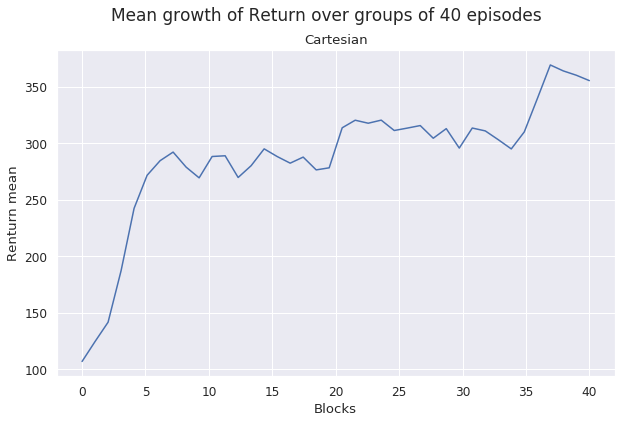

In [57]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 6), gridspec_kw={'wspace': 0})

fig.suptitle('Mean growth of Return over groups of ' + str(num_blocks) + ' episodes', fontsize = title_fs)

axs.plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs.grid(b=True)

axs.set_ylabel('Renturn mean')

axs.set_title("Cartesian")
axs.set(xlabel='Blocks')

## 3) Last iteration Policy

In [17]:
cpol = pd.read_csv("cpolicy_streamfunction2.txt")
ppol = pd.read_csv("ppolicy_streamfunction2.txt")

cpol.head(3)

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
0,0,12.0,2,0.000000,1141.362760,1146.079542,1259.500951
1,1000,14.0,2,2.045865,1154.506158,1149.955033,1378.333329
2,2000,16.0,2,2.531235,1156.516185,1152.218621,1560.707169


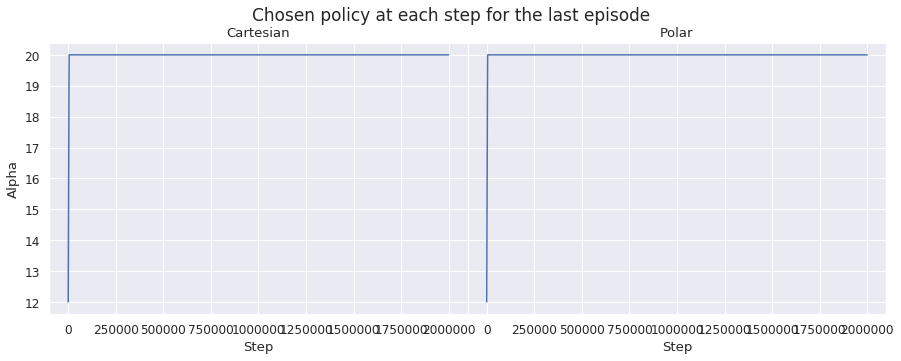

In [18]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Chosen policy at each step for the last episode ', fontsize = title_fs)

axs[0].plot(cpol['step'], cpol['alpha'])
axs[0].grid(b=True)

axs[1].plot(ppol['step'], ppol['alpha'])
axs[1].grid(b=True)

axs[0].set_ylabel('Alpha')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')

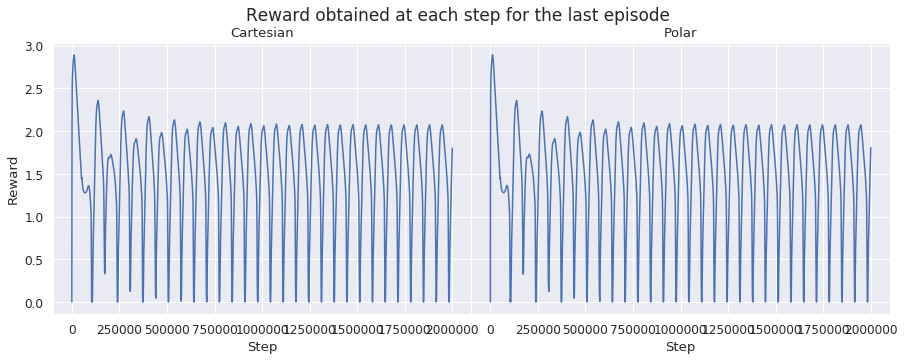

In [19]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Reward obtained at each step for the last episode', fontsize = title_fs)

axs[0].plot(cpol['step'], cpol['reward'])
axs[0].grid(b=True)

axs[1].plot(ppol['step'], ppol['reward'])
axs[1].grid(b=True)

axs[0].set_ylabel('Reward')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Step')

## 4) last episode dynamics plot

In [20]:
cout = pd.read_csv("cout_streamfunction2.txt")
pout = pd.read_csv("pout_streamfunction2.txt")

cout.head(3)

,t,x_kite,z_kite,x_block,z_block,theta,vtheta,windx,windy,v_block,Tension
0,0,35.355308,35.355370,0.000000,0.0,0.785398,0.002918,17.624153,15.060943,0.000580,280.286405
1,1000,30.172045,40.501523,0.852653,0.0,0.944040,2.001825,20.151026,7.358570,20.471276,18632.241097
2,2000,28.581578,43.100743,3.237427,0.0,1.039170,0.885498,21.430589,4.352975,25.313779,2556.740964


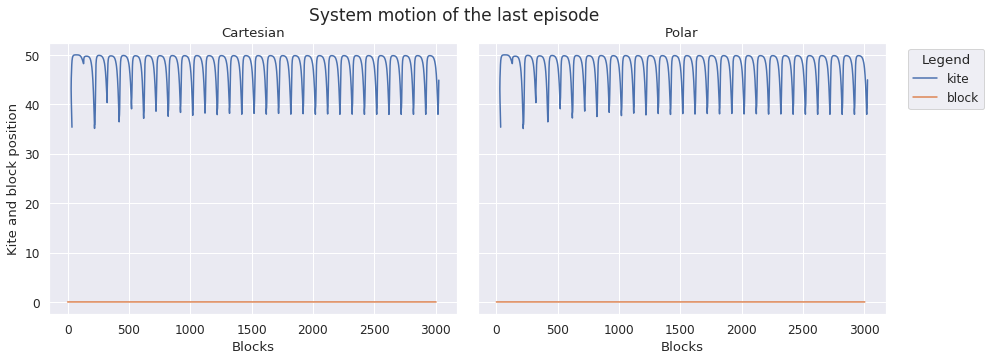

In [21]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0.05})

fig.suptitle('System motion of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(pout['x_kite'], pout['z_kite'],label='kite')
axs[1].plot(pout['x_block'], pout['z_block'],label='block')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')
#fig.savefig('prova.png', dpi=400)

## 6) Q matrix counter

In [22]:
cQ_count = pd.read_csv("cQ_counter_streamfunction2.txt")
pQ_count = pd.read_csv("pQ_counter_streamfunction2.txt")

cQ_count.head(5)

,episode,alpha_idx,action_0,action_1,action_2
0,9999,0,0,978,1055
1,9999,1,1092,1085,3298
2,9999,2,3401,14618,13505
3,9999,3,13656,42188,26205
4,9999,4,26410,59488,32160


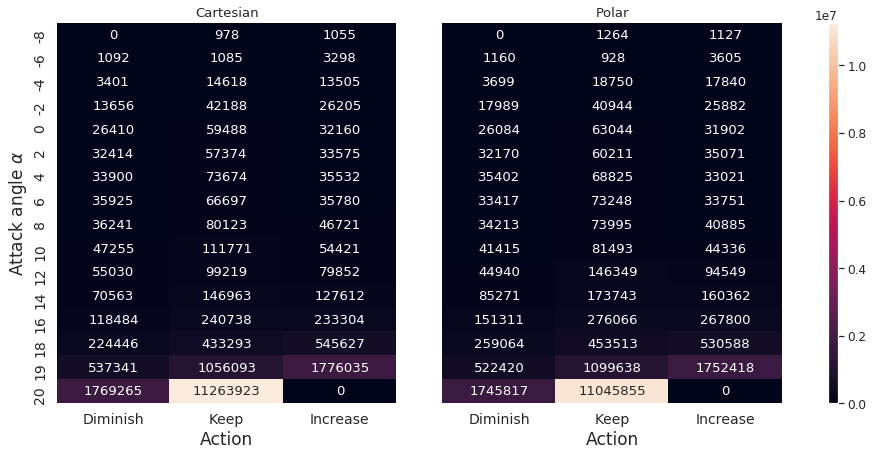

In [23]:
df1 = cQ_count[['action_0','action_1', 'action_2']]
df2 = pQ_count[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())
#print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="d", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="d", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()